# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [4]:
da_female_35_50 = da[(da['RIAGENDR'] == 2) & (da['RIDAGEYR'] >= 35) & (da['RIDAGEYR'] <= 50)]
da_female_35_50.reset_index(inplace = True, drop = True)
print(da_female_35_50)

      SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0    83736     2.0     1.0     1.0       2         2        42         4   
1    83799     NaN     NaN     NaN       2         2        37         2   
2    83828     1.0     NaN     2.0       2         2        39         1   
3    83832     2.0     1.0     4.0       2         2        50         1   
4    83837     2.0     2.0     NaN       2         2        45         1   
5    83845     1.0     NaN     NaN       1         2        44         4   
6    83851     2.0     1.0     1.0       1         2        37         3   
7    83853     NaN     NaN     NaN       2         2        49         3   
8    83854     2.0     1.0     1.0       2         2        46         1   
9    83875     2.0     2.0     NaN       2         2        42         4   
10   83885     2.0     2.0     NaN       2         2        38         5   
11   83903     2.0     2.0     NaN       1         2        47         4   
12   83909  

In [5]:
da_female_35_50_married = da_female_35_50[da_female_35_50['DMDMARTL']==1]
print(da_female_35_50_married)                             

      SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
1    83799     NaN     NaN     NaN       2         2        37         2   
2    83828     1.0     NaN     2.0       2         2        39         1   
4    83837     2.0     2.0     NaN       2         2        45         1   
6    83851     2.0     1.0     1.0       1         2        37         3   
7    83853     NaN     NaN     NaN       2         2        49         3   
8    83854     2.0     1.0     1.0       2         2        46         1   
9    83875     2.0     2.0     NaN       2         2        42         4   
10   83885     2.0     2.0     NaN       2         2        38         5   
11   83903     2.0     2.0     NaN       1         2        47         4   
12   83909     NaN     NaN     NaN       1         2        49         3   
14   83924     2.0     1.0     NaN       1         2        48         3   
15   83935     NaN     NaN     NaN       2         2        44         5   
16   83953  

In [7]:
da_female_35_50_not_married = da_female_35_50[da_female_35_50['DMDMARTL'].isin([2,3,4,5,6])]
print(da_female_35_50_not_married)             

      SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0    83736     2.0     1.0     1.0       2         2        42         4   
3    83832     2.0     1.0     4.0       2         2        50         1   
5    83845     1.0     NaN     NaN       1         2        44         4   
13   83911     1.0     NaN     1.0       2         2        43         4   
17   83958     2.0     1.0     2.0       1         2        47         4   
19   83963     1.0     NaN     2.0       2         2        44         4   
20   83989     1.0     NaN     3.0       1         2        37         4   
21   83993     1.0     NaN     2.0       2         2        41         4   
22   84006     1.0     NaN     2.0       1         2        45         4   
24   84033     1.0     NaN     1.0       1         2        41         5   
28   84065     2.0     2.0     NaN       2         2        48         3   
29   84073     2.0     1.0     2.0       1         2        39         2   
30   84077  

In [9]:
da_female_35_50_married.reset_index(inplace = True, drop =  True)
da_female_35_50_not_married.reset_index(inplace = True, drop = True)

In [10]:
proportion_married = sum(da_female_35_50_married['DMDEDUC2'] == 5) / len(da_female_35_50_married)
print(proportion_married)

0.36080178173719374


In [11]:
se_married = proportion_married * (1 - proportion_married)
se_married

0.23062385603246013

In [12]:
n_married = len(da_female_35_50_married['DMDEDUC2'])
n_married

449

In [13]:
ci_low = (proportion_married - 1.96 * np.sqrt((se_married / n_married)))
ci_upp = (proportion_married + 1.96 * np.sqrt((se_married / n_married)))
print('Lower Boundary: ', proportion_married - 1.96 * np.sqrt((se_married / n_married)))
print('Upper Boundary: ', proportion_married + 1.96 * np.sqrt((se_married / n_married)))

Lower Boundary:  0.3163811208674688
Upper Boundary:  0.4052224426069187


In [14]:
ci_upp-ci_low

0.08884132173944992

#### Proporcion de no Casados 

In [15]:
proportion_not_married = sum(da_female_35_50_not_married['DMDEDUC2'] == 5) / len(da_female_35_50_not_married) #proporcion de no casados
print(proportion_not_married)

0.21301775147928995


In [16]:
se_not_married = proportion_not_married * (1 - proportion_not_married) #error estandar
se_not_married

0.1676411890339974

In [17]:
n_not_married = len(da_female_35_50_not_married['DMDEDUC2']) #numero de mujeres que no estan casadas
n_not_married

338

In [18]:
#Intervalo de confianza de la proporcion
ci_low_nm = (proportion_not_married - 1.96 * np.sqrt((se_not_married / n_not_married)))
ci_upp_nm = (proportion_not_married + 1.96 * np.sqrt((se_not_married / n_not_married)))

print('Lower Boundary: ', proportion_not_married - 1.96 * np.sqrt((se_not_married / n_not_married)))
print('Upper Boundary: ', proportion_not_married + 1.96 * np.sqrt((se_not_married / n_not_married)))

Lower Boundary:  0.1693673655848136
Upper Boundary:  0.25666813737376626


In [19]:
ci_upp_nm - ci_low_nm

0.08730077178895265

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [20]:
da_smokers = da[da['SMQ020'] == 1]  #Seleccionamos dentro de nuestra matris de datos la columna SMQ020 indicandonos el numero 1 las personas que son fumadoras
da_smokers.reset_index(inplace = True, drop = True) #Hacemos que el indice se reinice ya que por la seleccion anterior no tenemos algo continuo
print(da_smokers)

       SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0     83732     1.0     NaN     1.0       1         1        62         3   
1     83733     1.0     NaN     6.0       1         1        53         3   
2     83734     1.0     NaN     NaN       1         1        78         3   
3     83741     1.0     NaN     8.0       1         1        22         4   
4     83747     1.0     NaN     1.0       1         1        46         3   
5     83750     1.0     NaN     3.0       1         1        45         5   
6     83752     1.0     NaN     2.0       1         2        30         2   
7     83762     NaN     NaN     NaN       1         2        27         4   
8     83775     2.0     1.0     NaN       1         2        69         2   
9     83784     1.0     NaN     4.0       1         1        22         2   
10    83785     2.0     1.0     1.0       1         2        60         2   
11    83788     2.0     1.0     1.0       1         2        69         3   

In [21]:
smoker_gender = da_smokers['RIAGENDR']  #Seleccionamos las columa de genero
print(smoker_gender)

smoker_gender = smoker_gender[~smoker_gender.isna()]
smoker_gender.reset_index(inplace=True, drop=True)

0       1
1       1
2       1
3       1
4       1
5       1
6       2
7       2
8       2
9       1
10      2
11      2
12      1
13      2
14      1
15      1
16      1
17      1
18      1
19      1
20      2
21      1
22      2
23      1
24      1
25      2
26      1
27      2
28      1
29      1
       ..
2289    2
2290    1
2291    2
2292    1
2293    1
2294    2
2295    1
2296    1
2297    2
2298    1
2299    2
2300    2
2301    1
2302    1
2303    2
2304    1
2305    1
2306    2
2307    1
2308    1
2309    1
2310    1
2311    2
2312    1
2313    2
2314    2
2315    1
2316    2
2317    2
2318    1
Name: RIAGENDR, Length: 2319, dtype: int64


In [22]:
n_smokers = len(smoker_gender) #Calculo el numero de fumadores total

n_smokers

2319

In [23]:
n_smokers_male = sum(smoker_gender == 1)  #Calculo el numero de hombres fumadores
print(n_smokers_male)

1413


In [24]:
n_smokers_female = sum(smoker_gender == 2) #Calculo el numero de mujeres fumadoras
print(n_smokers_female)

906


In [25]:
proportion_male_smokers = (n_smokers_male/n_smokers) #Calculo las proporciones de los hombres fumadores
print(proportion_male_smokers)

0.6093143596377749


In [26]:
proportion_female_smokers = (n_smokers_female/n_smokers) #Calculo las proporciones de las mujeres fumadoras
print(proportion_female_smokers)

0.3906856403622251


In [27]:
#Calcular del estimador del error estandar en los hombres fumadores
se_smokers_gender_male = np.sqrt((proportion_male_smokers * ( 1 - proportion_male_smokers)) / n_smokers_male)
print(se_smokers_gender_male)

0.012979661011895138

In [28]:
#Calcular del estimador del error estandar en las mujeres fumadoras
se_smokers_gender_female = np.sqrt((proportion_female_smokers * ( 1 - proportion_female_smokers)) / n_smokers_female)
print(se_smokers_gender_female)

0.016209526631489866

In [29]:
#Calcular los intervalos de confianza (IC) para el 95% para los hombres fumadores, ojo el valor Z para un intervalo de confinaza 
# de 95% es +1.96 y -1.96
print('Lower Boundary Male: ', proportion_male_smokers - 1.96 * se_smokers_gender_male)
print('Upper Boundary Male: ', proportion_male_smokers + 1.96 * se_smokers_gender_male)

Lower Boundary Male:  0.5838742240544604
Upper Boundary Male:  0.6347544952210894


In [35]:
0.6347544952210894-0.5838742240544604

0.050880271166628965

In [30]:
#Calcular los intervalos de confianza (IC) para el 95% para mujeres fumadoras, ojo el valor Z para un intervalo de confinaza 
# de 95% es +1.96 y -1.96
print('Lower Boundary Male: ', proportion_female_smokers - 1.96 * se_smokers_gender_female)
print('Upper Boundary Male: ', proportion_female_smokers + 1.96 * se_smokers_gender_female)

Lower Boundary Male:  0.35891496816450497
Upper Boundary Male:  0.4224563125599452


In [36]:
0.4224563125599452-0.35891496816450497

0.06354134439544024

In [38]:
#Sacamos las deifrencias entre las proporciones de hombres vs mujeres
proportion_smokers_gender_diff = proportion_male_smokers - proportion_female_smokers 
proportion_smokers_gender_diff

0.21862871927554983

In [41]:
#Calculamos el error estadar para la diferencia entre dos estimaciones (muestras independientes)
se_proportion_smokers_diff = np.sqrt((se_smokers_gender_male**2) + (se_smokers_gender_female**2))
print(se_proportion_smokers_diff)

0.020765845843612775


In [42]:
#Calcular los intervalos de confianza (IC) del 95% para las diferencias entre dos estimaciones (muestras independientes),
#ojo el valor Z para un intervalo de confinaza de 95% es +1.96 y -1.96

print('Lower Boundary Gender Difference: ', proportion_smokers_gender_diff - 1.96 *se_proportion_smokers_diff)
print('Upper Boundary Gender Difference: ', proportion_smokers_gender_diff + 1.96 *se_proportion_smokers_diff)

Lower Boundary Gender Difference:  0.17792766142206878
Upper Boundary Gender Difference:  0.2593297771290309


In [43]:
0.2593297771290309-0.17792766142206878

0.0814021157069621

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [3]:
height_cm = da['BMXHT']  #seleccionamos la columna que necesitamos en este caso BMXHT

In [4]:
#calculamos el indice de la variable anterior
height_cm = height_cm[~height_cm.isna()]  
height_cm.reset_index(inplace=True, drop=True)  

In [6]:
mean_height_cm = np.mean(height_cm)  #Calculamos la media
print(mean_height_cm)

166.1428344791116


In [8]:
height_inches = ((height_cm)/2.54) #transformamos las medidas de altura de cm a inches
print(height_inches)

0       72.637795
1       67.480315
2       66.968504
3       63.346457
4       64.921260
5       59.055118
6       65.118110
7       59.566929
8       65.393701
9       70.629921
10      69.566929
11      70.000000
12      64.409449
13      64.606299
14      72.362205
15      59.370079
16      69.055118
17      61.574803
18      66.338583
19      59.015748
20      67.204724
21      58.976378
22      63.070866
23      62.007874
24      65.393701
25      63.267717
26      67.204724
27      57.165354
28      71.732283
29      59.842520
          ...    
5643    65.314961
5644    65.314961
5645    66.653543
5646    60.078740
5647    70.000000
5648    61.574803
5649    64.803150
5650    62.047244
5651    69.724409
5652    66.771654
5653    66.771654
5654    58.661417
5655    66.968504
5656    68.622047
5657    58.110236
5658    70.472441
5659    63.661417
5660    65.905512
5661    61.811024
5662    65.708661
5663    71.220472
5664    61.771654
5665    59.803150
5666    64.921260
5667    53

In [9]:
#calculamos el indice de la variable anterior
height_inches = height_inches[~height_inches.isna()]  
height_inches.reset_index(inplace=True, drop=True)  

In [12]:
#media de las alturas en inches
mean_height_inches = np.mean(height_inches)
print(mean_height_inches)

65.41056475555574


In [13]:
#calculo de el numero de individuos que tengo en mi poblacion
n_height_inches = len(height_inches)
print(n_height_inches)

5673


In [14]:
#Calculo de la desviacion estandar
std_height_inches = np.std(height_inches)
print(std_height_inches)

3.9678642989700483


In [15]:
#Calcular el intervalo de confianza con la formula x +- Z* desviacion estandar/raiz cuadrada del numero de individuos de la pop

print('Lower Boundary Inches: ', np.mean(height_inches)- 1.96 *(std_height_inches/np.sqrt(n_height_inches)))
print('Upper Boundary Inches: ', np.mean(height_inches)+ 1.96 *(std_height_inches/np.sqrt(n_height_inches)))

Lower Boundary Inches:  65.30731084935782
Upper Boundary Inches:  65.51381866175366


In [17]:
sm.stats.DescrStatsW(height_inches).tconfint_mean() #Otra manera de calcular con la funcion stats

(65.30728160535489, 65.51384790575659)

In [19]:
print('Lower Boundary cm: ', (np.mean(height_inches) - 1.96 *(std_height_inches/np.sqrt(n_height_inches)))*2.54)
print('Upper Boundary cm: ', (np.mean(height_inches) + 1.96 *(std_height_inches/np.sqrt(n_height_inches)))*2.54)

Lower Boundary cm:  165.88056955736886
Upper Boundary cm:  166.4050994008543


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [3]:
#NO POOLED
# Hacer la particion de la muestra cada 10,y resetaer el indice
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band = da[(da['RIDAGEYR'] >= val[0]) & (da['RIDAGEYR'] <= val[1])]
    da_year_band.reset_index(inplace=True, drop=True)

In [5]:
#Hacer una variable para tomar a los hombres y el BMI
bmi_males = da_year_band[da_year_band['RIAGENDR'] == 1]['BMXBMI']
print(bmi_males)

4      29.1
5      24.2
10     26.0
14     34.6
15     25.5
16     20.3
17     29.4
20     21.8
21     18.0
25     23.7
26     24.0
27     32.1
28     29.9
29     29.1
33     40.3
35     38.8
36     30.9
37     25.2
40     24.4
43     29.8
45     22.2
46     26.6
50     20.8
51     21.5
52     29.4
56     23.8
57     26.0
63     26.5
64     26.7
65     28.4
       ... 
315    29.4
316    23.7
319    25.9
321    33.9
322    30.3
323    32.2
325    18.2
326    35.8
327    31.2
330    30.0
331    27.3
333    37.5
334    36.3
335    22.2
337    20.2
340    22.6
344    28.4
345    22.5
353    19.2
355    28.1
356    29.3
357    20.5
358    33.7
360    25.0
363    21.4
367    28.2
368    27.5
370    39.8
373    22.1
376     NaN
Name: BMXBMI, Length: 177, dtype: float64


In [6]:
#Hacer una variable para tomar a las mujeres y el BMI
bmi_females = da_year_band[da_year_band['RIAGENDR'] == 2]['BMXBMI']
print(bmi_females)

0      30.2
1      28.0
2      23.7
3      28.5
6      24.0
7      20.1
8      23.5
9      26.9
11     20.8
12     29.1
13     28.6
18     27.2
19     24.1
22     27.6
23     27.5
24     26.6
30     26.2
31     22.9
32     19.9
34     25.1
38     25.8
39     33.4
41     22.4
42     22.6
44     26.3
47     25.9
48     30.0
49     31.2
53     40.4
54     28.2
       ... 
324    35.0
328    44.2
329    30.5
332    32.5
336    16.5
338    29.2
339    32.6
341    24.9
342    25.8
343    21.0
346    23.3
347    26.1
348    20.6
349    29.8
350    19.5
351    30.1
352    34.7
354    27.2
359    21.6
361    26.4
362    36.3
364    37.1
365    37.1
366     NaN
369    32.3
371    36.3
372    26.5
374    25.6
375    27.8
377    31.0
Name: BMXBMI, Length: 201, dtype: float64


In [9]:
#Eliminar los valores desaparecidos
bmi_males = bmi_males[~bmi_males.isna()]
bmi_males.reset_index(inplace=True, drop=True)

In [8]:
#Eliminar los valores desaparecidos
bmi_females = bmi_females[~bmi_females.isna()]
bmi_females.reset_index(inplace=True, drop=True)

In [11]:
print("Std Males: ", np.std(bmi_males))
print("Std Females: ", np.std(bmi_females))
print("Variance Ratio: ", (np.std(bmi_males)**2)/(np.std(bmi_females)**2))
print("_________________________________________________________")

Std Males:  4.682137173170974
Std Females:  5.469915424161031
Variance Ratio:  0.7327014375317858
_________________________________________________________


In [ ]:
#POOLED
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band=da[(da['RIDAGEYR']>=val[0])&(da['RIDAGEYR']<=val[1])]
    da_year_band.reset_index(inplace=True, drop=True)

In [ ]:
bmi_males = da_year_band[da_year_band['RIAGENDR'] == 1]['BMXBMI']
bmi_females = da_year_band[da_year_band['RIAGENDR'] == 2]['BMXBMI']

In [12]:
bmi_males=bmi_males[~bmi_males.isna()]
bmi_males.reset_index(inplace=True, drop=True)
bmi_females=bmi_females[~bmi_females.isna()]
bmi_females.reset_index(inplace=True, drop=True)    

In [15]:
bmi_males_temp=sm.stats.DescrStatsW(bmi_males)
print(bmi_males_temp)
bmi_females_temp=sm.stats.DescrStatsW(bmi_females)
print(bmi_females_temp)

In [20]:
cm = sm.stats.CompareMeans(bmi_males_temp, bmi_females_temp)
lower, upper=cm.tconfint_diff(usevar='pooled')

In [22]:
print(val)
print("pooled: ", lower, ",", upper)
print("pooled diff: ", abs(upper) - abs(lower))
print('-----------------------------------------------------')

[79, 88]
pooled:  -1.4339280761211892 , 0.6626637083050806
pooled diff:  -0.7712643678161086
-----------------------------------------------------


__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [25]:
#Seleecionar las columans que tenemos las variables
first_sbp = da['BPXSY1']
second_sbp = da['BPXSY2']
sbp_diff = first_sbp - second_sbp
print(sbp_diff)

0        4.0
1        6.0
2        6.0
3       -2.0
4      -14.0
5       -6.0
6       -2.0
7        6.0
8        NaN
9       -2.0
10      -6.0
11       8.0
12       0.0
13       8.0
14      -4.0
15     -12.0
16       0.0
17       2.0
18      -6.0
19      10.0
20       4.0
21       2.0
22       8.0
23       6.0
24       4.0
25      -2.0
26      -2.0
27       6.0
28      -8.0
29      -2.0
        ... 
5705     6.0
5706    -8.0
5707    -2.0
5708     2.0
5709     6.0
5710     NaN
5711     4.0
5712     8.0
5713     2.0
5714    -4.0
5715    -2.0
5716     NaN
5717     0.0
5718     8.0
5719     NaN
5720    -8.0
5721     4.0
5722     4.0
5723     6.0
5724    10.0
5725    -2.0
5726     4.0
5727    -2.0
5728    -6.0
5729     0.0
5730     0.0
5731     2.0
5732     8.0
5733    -2.0
5734     4.0
Length: 5735, dtype: float64


In [26]:
#Creando indices nuevso en cada una de las variables
first_sbp=first_sbp[~first_sbp.isna()]
first_sbp.reset_index(inplace=True, drop=True)
second_sbp=second_sbp[~second_sbp.isna()]
second_sbp.reset_index(inplace=True, drop=True)

In [27]:
#Creando un indice para la diferencia
sbp_diff = sbp_diff[~sbp_diff.isna()]
sbp_diff.reset_index(inplace = True, drop = True)

In [28]:
#Crear el IC para la primera medida de presion
lower, upper = sm.stats.DescrStatsW(first_sbp).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

124.59163222328895 , 125.57759569746646
0.9859634741775096


In [29]:
#Crear el IC para la segunda medidad de presion
lower, upper=sm.stats.DescrStatsW(second_sbp).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

124.29482629577244 , 125.27120803123749
0.9763817354650541


In [30]:
#Crear el IC de la difrencia entre las dos medidas
lower, upper=sm.stats.DescrStatsW(sbp_diff).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

0.5399696008802797 , 0.8100024609561889
0.2700328600759092


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [32]:
smokers_age = da[da['SMQ020']==1]['RIDAGEYR']
smokers_age = smokers_age[~smokers_age.isna()]
smokers_age.reset_index(inplace=True, drop=True)

In [34]:
non_smokers_age = da[da['SMQ020']!=1]['RIDAGEYR']
non_smokers_age = non_smokers_age[~non_smokers_age.isna()]
non_smokers_age.reset_index(inplace=True, drop=True)

In [35]:
smokers_age_temp = sm.stats.DescrStatsW(smokers_age)
non_smokers_age_temp = sm.stats.DescrStatsW(non_smokers_age)

In [36]:
#Comparar las medias de los no smokers and smokers
cm = sm.stats.CompareMeans(smokers_age_temp, non_smokers_age_temp)
#Calculo del intervalo de confianza
lower, upper = cm.tconfint_diff(usevar='pooled')
print("pooled: ", lower, ",", upper)

pooled:  5.833562476381499 , 7.746041103858306


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [37]:
smokers_age.describe()

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [38]:
non_smokers_age.describe()

count    3416.000000
mean       45.306792
std        18.568337
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

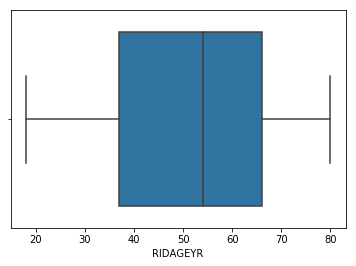

In [39]:
sns.boxplot(smokers_age)

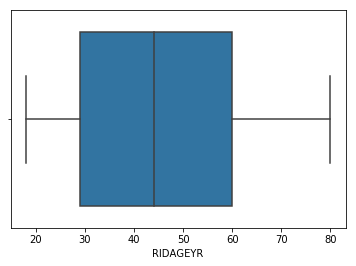

In [40]:
sns.boxplot(non_smokers_age)


__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?